# UX 11 Non-parametric tests

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals

After working your way through this notebook, you should be able to..
- Explain when and why we use non-parametric tests
- Perform common non parametric tests:
    - Mann-Whitney test
    - Wilcoxon rank-sum test
    - Wilcoxon signed-rank test
    - Kruskal–Wallis test
    - Friedman’s ANOVA

## Table of Contents

- [1. Parametric vs. Non-parametric tests](#Nonpar)
- [2. Comparing two groups of scores](#Interval)
    - [2.1 Independent samples: Mann-Whitney test](#MannWhitney)
    - [2.2 Related samples: Wilcoxon signed-rank test](#Wilcoxon)
- [3. More than two conditions](#Moresamples)
    - [3.1 Independent groups: Kruskal-Wallis Test](#Kruskal)
    - [3.2 Repeated measures: Friedman’s Test](#Friedmans)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

<a id= 'Nonpar'> </a>

## 1. Parametric vs. Non-parametric tests
Previously we have looked at categorical data and how chi-square tests can be used to compare frequencies in different categories, where the sample size is small. When we cannot calculate proportions/percentages we cannot use parametric tests such as the t-test but chi-square is not parametric. That is, it does not assume, for instance, that the population the data sample is drawn from is normally distributed. 

While chi-square is used for categorical data we will here go through the non-parametric test alternatives to be used for other types of data. So why do we not just rely on them all the time? Why go through the trouble of checking parametric assumptions such as normality if we can skip straight to a non parametric test? 

The answer is that parametric tests typically have more statistical power to detect an effect. If you recall from UX6, smaller effects could mean that a less powerful test would miss an existing effect (
resulting in a Type II error). That is, given a specific alpha-level, we are more likely to detect a real change with smaller sample sizes when we use parametric tests than when we use non-parametric tests.

So there are plenty of reasons for us to want parametric data and to check whether our data fulfill the assumtions to use them. But if these are violated, there are alternatives that can be used.

It is difficult to remember what test to use in what situation. Again, flow-charts such as this here below are helpful to find the right non-parametric tests for the type of data you have https://pingouin-stats.org/build/html/guidelines.html#non-parametric

![flowchart_non-parametric](https://pingouin-stats.org/build/html/_images/flowchart_nonparametric.svg)


<a id= 'Interval'> </a>

## 2. Comparing Two Groups of Scores

In many cases we have quantitative data that does not fulfil the assumptions for parametric tests. Perhaps the plan was to run a t-test, but the scores are skewed or variances too different between groups. 

Rather than relying on the mean and variance as we would for parametric data, the approach is then to *rank* it. Instead of using the actual scores in the data, we arrange them such that the lowest score receive the rank of 1, the next highest score 2, etc. The test statistic is then calculated on these ranks. This also means that we do not have to make any assumptions about the data (with respect to the shape of their distribution for example). In the process we also lose information, and hence these tests are not as powerful at detecting effects as parametric tests. 


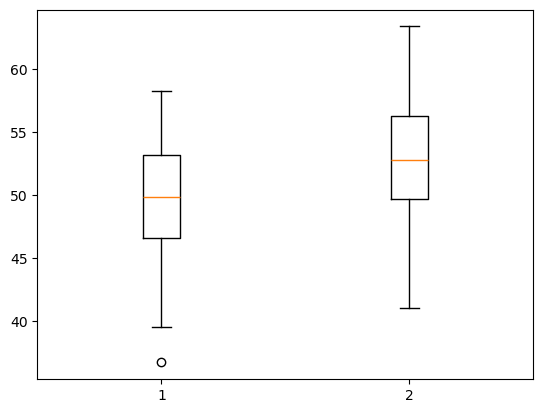

In [2]:
# Generate two sets of univariate observations with 100 observations
N = 100
data1 = 5 * np.random.randn(N) + 50
data2 = 5 * np.random.randn(N) + 53
# Summarize
plt.boxplot([data1,data2])
plt.show()


<a id= 'MannWhitney'> </a>

### 2.1 Independent Samples: Mann-Whitney Rank-Sum Test
The Mann-Whitney Rank-Sum Test compares two independent groups of scores and is the non-parametric equivalent of the independent t-test. 

The test compares the ranked positions of scores in the two groups. The pingouin function returns the probability that these two samples are from the same distribution (but, again, based on ranks and without assumptions on the shape).

In [3]:
# Mann-Whitney rank-sum test on data1 and data2
#returns table 
pg.mwu(data1, data2)

,U-val,alternative,p-val,RBC,CLES
MWU,3264.0,two-sided,0.000022,-0.3472,0.3264


In the table returned by function we can see the statistic (U-val) and probability, as well as two measures of effect size: rank-biserial correlation (RBC) and the common language effect size (CLES).

The effect-size for the Mann-Whitney test can also be calculated from the number of observations (N) and the z-score. Check the function notes to see how this is done. 

In [4]:
# Learn more about the functions 
# help(pg.mwu)
#or
# help(stats.mannwhitneyu)

### Try out 1: 
Go back up to the generation of data and change N to 30. Redo the Mann-Whitney rank-sum test and compare. 

<a id= 'Wilcoxon'> </a>

### 2.2 Related samples: Wilcoxon signed-rank test
The Mann-Whitney test is for *independent* samples. If we instead want to compares two related groups of scores we use the Wilcoxon signed rank test.

Again, data is ranked and the test examines the difference between the ranks in the two groups. This can be either negative (the 2nd condition rank is smaller than that in the first), positive (the 2nd condition rank is larger than that in the first), or tied (no difference between the ranks in the two conditions).

In this example we use data from a known psychological experiment "Stroop test" and shows the time (in seconds) each participant needed to label the colours in, where the colours can be either "congruent" with the word or "incongruent" as here:

![stroop-text](https://upload.wikimedia.org/wikipedia/commons/d/dd/Stroop_icon.svg)
Grutness at en.wikipediaOwn work, Public domain, via Wikimedia Commons

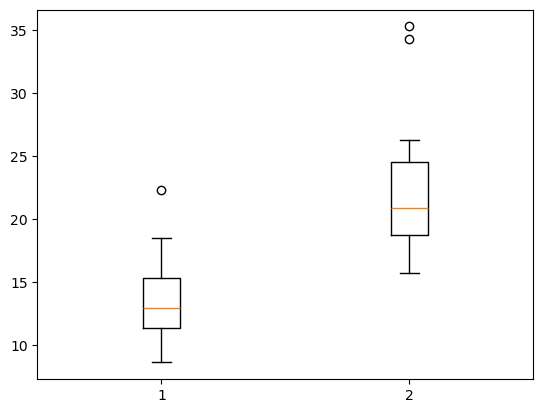

In [5]:
#Load participant reaction times for congruent and incongruent
df= pd.DataFrame([[ 0,12.079,19.278],
    [1, 16.791,18.741],
    [2, 9.564,21.214],
    [3, 8.630,15.687],
    [4, 14.669, 22.803],
    [5, 12.238, 20.878],
    [6, 14.692, 24.572],
    [7, 8.987, 17.394],
    [8, 9.401, 20.762],
    [9, 14.480, 26.282],
    [10, 22.328, 24.524],
    [11, 15.298, 18.644],
    [12, 15.073, 17.510],
    [13, 16.929, 20.330],
    [14, 18.200, 35.255],
    [15, 12.130, 22.158],
    [16, 18.495, 25.139],
    [17, 10.639, 20.429],
    [18, 11.344, 17.425], 
    [19, 12.369, 34.288],
    [20, 12.944, 23.894]], columns=(["Participant","Congruent","Incongruent"]))
plt.boxplot([df.Congruent,df.Incongruent])
plt.show()

The test has related samples because each participant had both congruent and incongruent stimuli to respond to.
Like most reaction time data, the values are likely to be skewed, so for instance a q-q plot will indicate problems with normality.

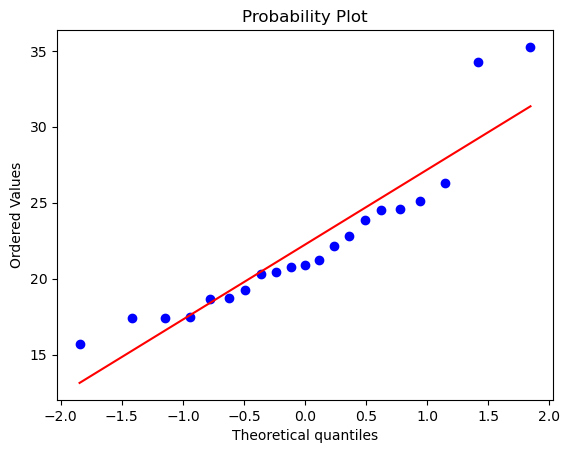

In [6]:
# Plot q-q plot
stats.probplot(df.Incongruent, plot=plt);

plt.show()

We can use the Wilcoxon signed rank test to test the hypothesis that two related samples come from the same distribution. Similar to the related t-test, it checks whether differences between scores (reaction times) are different from zero.

In [7]:
# Perform Wilcoxon test (from pingouin) on the difference between conditions
pg.wilcoxon(df.Congruent,df.Incongruent)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,9.536743e-07,-1.0,0.052154


Similar to the Mann-Whitney test, we get a table with statistic (W-val), probability (p-val) and two measures of effect size (rank-biserial correlation RBC and common language effect size CLES)

The resulting p-value shows that it is highly unlikely that the two sets of scores would come from the same distribution. So the test confirms what might be guessed from the plot: it takes considerably longer to read the colour in the incongruent condition. 


<a id= 'Moresamples'> </a>


## 3 More than Two Groups

As in the parametric case, we should avoid multiple comparisons when we have more than two samples or conditions. So just as we use ANOVA to examine main effects for groups when we have more than two conditions, we use the non-parametric equivalents when the parametric assumptions are not fulfilled.

We can generate some data to demonstrate this.

In [8]:
data_array1 = np.array([np.random.randn(100)*5 + 50, np.random.randn(100)*5 + 50, np.random.randn(100)*5 + 54])

df=pd.DataFrame(data_array1.T, columns=(["A","B","C"]))
df.head()


,A,B,C
0,54.743140,46.407976,56.655698
1,57.574112,54.254761,54.993255
2,43.846065,41.777707,51.137331
3,50.548049,53.796151,58.033631
4,50.588226,60.153266,51.265550


Note that the data frame is in wide format. We change it to long format to use the pingouin function kruskal.

In [9]:
#Our data is in wide format, but we need to change it to long format to make use of the pingouin function 
longdf=df.melt( value_vars=['A', 'B', 'C'], var_name='Condition', value_name='Score')

#Check size of dataframe, instead of 100 rows, you should now have 100x3 rows
longdf.shape

(300, 2)

<a id= 'Kruskal'> </a>

### 3.1  Independent Groups: Kruskal-Wallis Test

In case we have more than two independent samples, the Kruskal-Wallis is the non-parametric alternative to one-way independent ANOVA. It tests the hypothesis that the population median of all groups are equal. 

Similar to the two-group examples above, the test is performed on ranked data. The sample sizes of the different groups can be different, but must not be too small. As always, it is a good idea to check the details of the function beforehand. 

In [10]:
# kruskal from pingouin
pg.kruskal(data=longdf, dv='Score', between='Condition')

,Source,ddof1,H,p-unc
Kruskal,Condition,2,36.254132,1.341267e-08


Out from the function we get a table with degrees of freedom (ddof1), the Kruskal-Wallis H statistic and the p-value. 

From the result we can conclude that at least one of the groups has a median that is significantly different from the other two. To check which group, we need to follow up with pairwise tests (just like normal ANOVA). In the flow chart at the top there is a function suggested. Field & Hole (2003) also suggest using Mann-Whitney tests but with Bonferroni correction of the significance level, and being selective about the pairwise comparisons needed. 

<a id= 'Friedmans'> </a>

### 3.2 Repeated measures: Friedman Test
When we have used the same participants in all conditions, the observations are related. The Friedman test compares more than two paired samples and is the non-parametric version of repeated measures ANOVA. 

The pingouin function can take both wide and long data format, so we will just use the wide data frame we generated above.

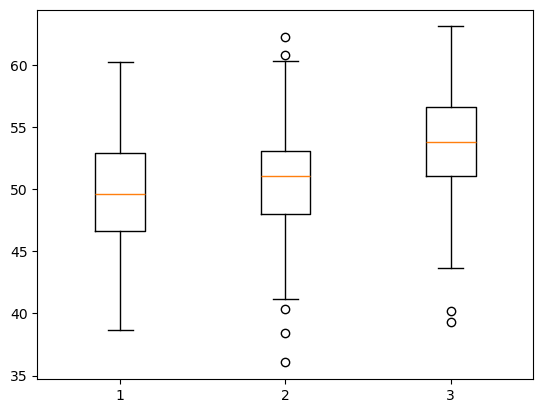

In [11]:
plt.boxplot(df)
plt.show()

Since the data is in wide format, we do not have to specify much in the function call. Check help(pg.friedman) for what parameters to use in long data format.

In [12]:
#Since data is in wide format, we do not have to specify much.
pg.friedman(data=df)

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.2061,2,41.22,1.119930e-09


The function return Kendall's W, which can be used for assessing inter-rater reliability (where 1 is complete agreement), the degrees of freedom, and  Q, which is the Friedman $\chi^2$ statistic. The probability (p-unc) indicates that at least one of the conditions produce results significantly different than the other two. Similar to the independent Kruskal-Wallis case, we need to follow up with pairwise comparisons to answer the question what condition that is different.

### Try out 2: 
Redo the Friedman test using the longdf data frame in the call, specifying the dependent variable and within factor.